# <div align="center"> Using Live Stock market data to create Efficient Frontier </dov>

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Different time periods to do the analyis on

start=dt.datetime(2012,10,15)
end=dt.datetime(2022,9,15)

In [3]:
#Stocks

tickers = ["AAPL","NKE","GOOGL","AMZN"]

In [4]:
#Loading Stock Market Data

Price = pd.DataFrame()

for t in tickers:
    Price[t] = yf.download(t, start=start,end=end, interval="1d")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#calculating Expected Returns and Covariance Matrix

Re = Price.pct_change()
Re = Re.loc[~(Re==0).all(axis=1)]
#Re= Re.fillna(method="backfill")
Re = np.log(Re+1)
ERe = Re.mean()
CovRe = Re.cov()

### Performining Monte Carlo simulation to get efficient fronther

In [6]:
p_ret = pd.DataFrame([],index=[],columns=["Returns"]) # Define an empty array for portfolio returns
p_vol = pd.DataFrame([],index=[],columns=["Volatility"]) # Define an empty array for portfolio volatility
p_SR = pd.DataFrame([],index=[],columns=["SR"])
p_weights = [] # Define an empty array for asset weights
num_assets = len(Re.columns)
num_portfolios = 10000

In [7]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = weights @ ERe*252 # Returns are the product of individual expected returns of asset and its weights 
    p_ret.at[portfolio,"Returns"] = returns
    sd = (weights @ CovRe @ weights*252)**0.5
    p_vol.at[portfolio,"Volatility"] = sd
    SR = returns/sd
    p_SR.at[portfolio,"SR"] = SR

In [8]:
data = pd.DataFrame()
for counter, symbol in enumerate(Re.columns):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [9]:
Portfolio = pd.concat([p_ret,p_vol,p_SR, data],axis=1)

In [10]:
for i in Portfolio.columns:
    Portfolio[i]=pd.to_numeric(Portfolio[i])
Portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Returns       10000 non-null  float64
 1   Volatility    10000 non-null  float64
 2   SR            10000 non-null  float64
 3   AAPL weight   10000 non-null  float64
 4   NKE weight    10000 non-null  float64
 5   GOOGL weight  10000 non-null  float64
 6   AMZN weight   10000 non-null  float64
dtypes: float64(7)
memory usage: 883.0 KB


### Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

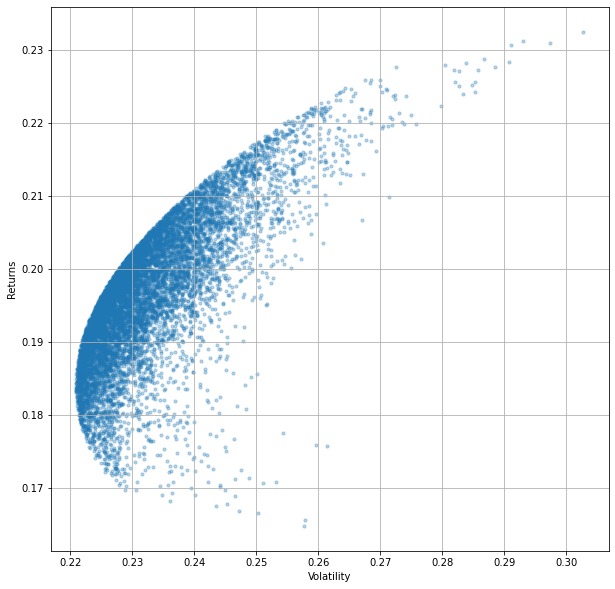

In [11]:
Portfolio.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.30, grid=True, figsize=[10,10])

### Minimum volatility portfolio

In [12]:
min_vol_port = Portfolio.iloc[Portfolio['Volatility'].idxmin()]

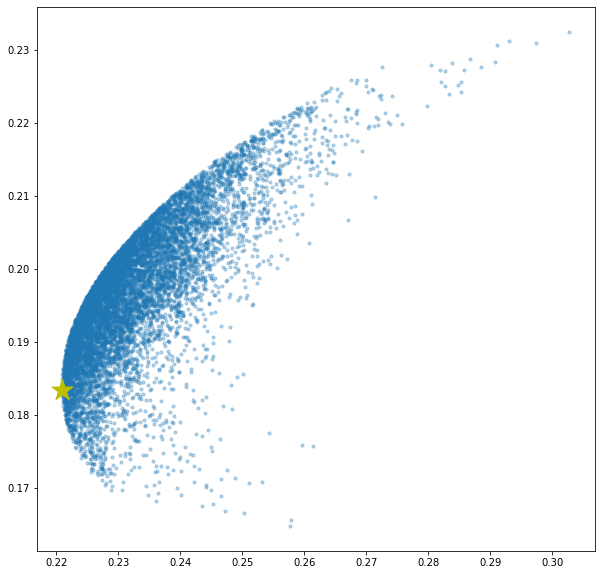

In [13]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)

### Optimum Portfolio

In [14]:
optimal_risky_port = Portfolio.iloc[Portfolio['SR'].idxmax()]

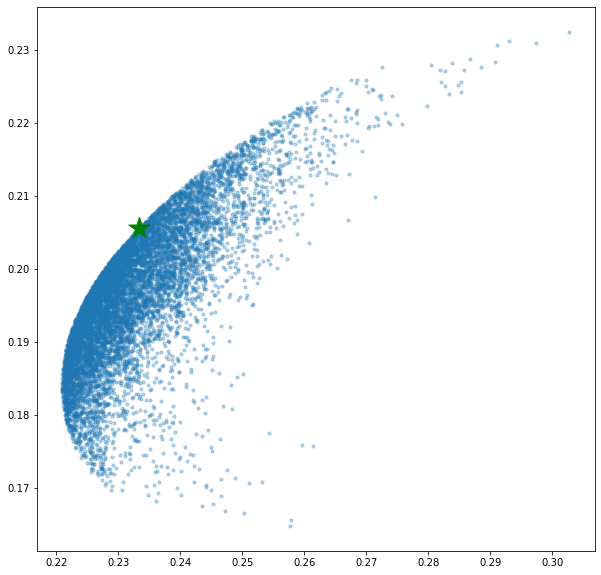

In [15]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

### Maximum return portfolio

In [16]:
max_ret_port = Portfolio.iloc[Portfolio['Returns'].idxmax()]

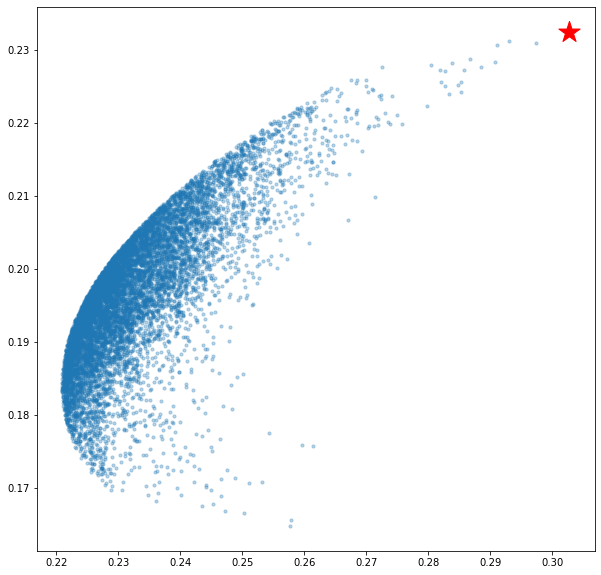

In [17]:
plt.subplots(figsize=[10,10])
plt.scatter(Portfolio['Volatility'], Portfolio['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(max_ret_port[1], max_ret_port[0], color='r', marker='*', s=500)